Clustering the data and performing classification algorithms


1. Downloaded the dataset

Import libraries


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

2. Load the dataset into the tool

In [4]:
data = pd.read_csv(r"C:\Users\user\Downloads\Mall_Customers (1).csv")

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Perform Below Visualizations

3.1 Univariate Analysis 

<AxesSubplot:ylabel='Frequency'>

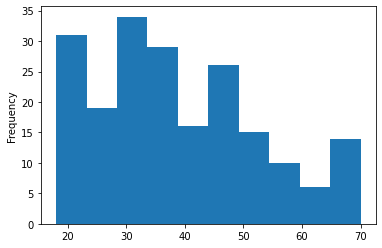

In [6]:
#Histogram
data['Age'].plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x24c5e963d30>,
 'caps': [<matplotlib.lines.Line2D at 0x24c5e9753d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c5e963a60>],
 'medians': [<matplotlib.lines.Line2D at 0x24c5e9758b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c5e975b80>],
 'means': []}

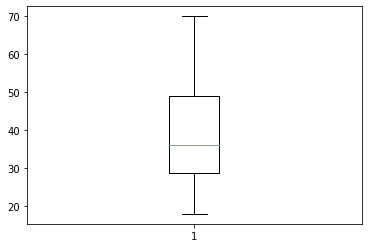

In [7]:
#Boxplot
plt.boxplot(data['Age'])

<BarContainer object of 200 artists>

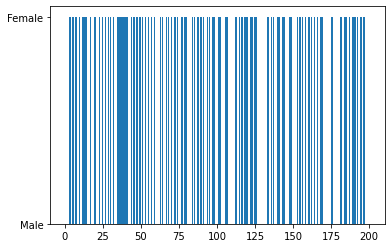

In [8]:
#Bar chart
df = pd.DataFrame(data)
X = list(df.iloc[:,0])
Y = list(df.iloc[:,1])
plt.bar(X,Y)

3.2 Bi- Variate Analysis

<BarContainer object of 200 artists>

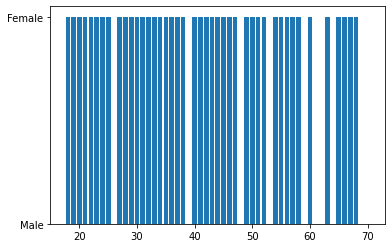

In [11]:
#Stacked Bar Chart
plt.bar(data['Age'],data['Gender'])

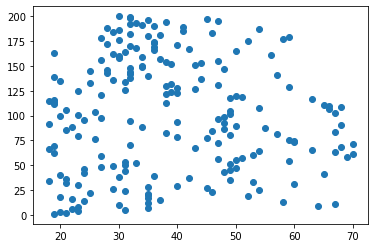

In [12]:
plt.scatter(data['Age'],data['CustomerID'])


3.3 Multi-Variate Analysis

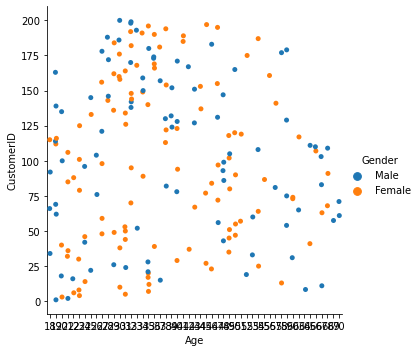

In [13]:
sns.catplot(data=data,x='Age',y='CustomerID',hue='Gender')

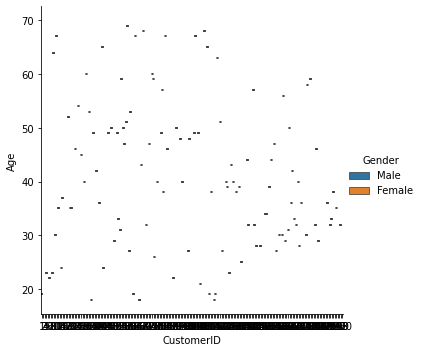

In [14]:
#Box Plot
sns.catplot(data=data,x='CustomerID',y='Age',hue='Gender',kind='box')

4. Perform descriptive statistics on the dataset. 

In [15]:
data.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_7768\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [16]:
data.median()

C:\Users\user\AppData\Local\Temp\ipykernel_7768\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
data.shape


(200, 5)

5. Check for Missing values and deal with them. 

In [21]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

6. Find the outliers and replace them outliers 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

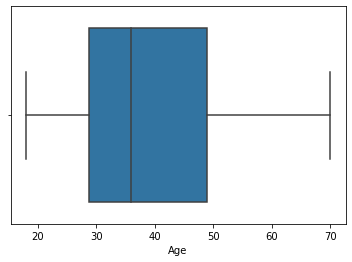

In [23]:
sns.boxplot(data['Age'])


In [24]:
qnt = data.quantile(q=[0.25,0.75])
qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [25]:
IQR = qnt.loc[0.75] - qnt.loc[0.25]
IQR

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [26]:
upper_extreme = qnt.loc[0.75]+1.5*IQR
upper_extreme

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [27]:
lower_extreme = qnt.loc[0.25]-1.5*IQR
lower_extreme

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [28]:
df2 = data[(data['Age']<upper_extreme['Age']) & (data['Age']>lower_extreme['Age'])]
df.shape

(200, 5)

In [29]:
df2.shape

(200, 5)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

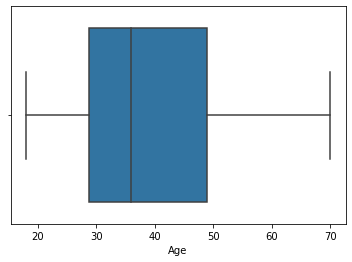

In [30]:
sns.boxplot(df2['Age'])

7. Check for Categorical columns and perform encoding. 

In [31]:
le = LabelEncoder()
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['Age'] = le.fit_transform(df2['Age'])
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,15,39
1,2,1,3,15,81
2,3,0,2,16,6
3,4,0,5,16,77
4,5,0,13,17,40


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    object 
 1   Age                     200 non-null    float64
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


In [39]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,0.019231,15,39
1,Male,0.057692,15,81
2,Female,0.038462,16,6
3,Female,0.096154,16,77
4,Female,0.250000,17,40


8. Scaling the data

In [58]:
scaler = MinMaxScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
df



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,15,39
1,2,Male,0.057692,15,81
2,3,Female,0.038462,16,6
3,4,Female,0.096154,16,77
4,5,Female,0.250000,17,40
...,...,...,...,...,...
195,196,Female,0.326923,120,79
196,197,Female,0.519231,126,28
197,198,Male,0.269231,126,74
198,199,Male,0.269231,137,18


9. Perform any of the clustering algorithms

In [59]:
from sklearn.cluster import KMeans
km = KMeans()
clus = km.fit_predict(df[['Age']])

In [60]:
clus

array([0, 0, 0, 6, 2, 0, 4, 6, 3, 2, 3, 4, 5, 6, 4, 0, 4, 0, 1, 4, 4, 6,
       1, 2, 5, 2, 1, 4, 7, 6, 5, 0, 5, 0, 1, 0, 7, 2, 4, 0, 3, 6, 1, 2,
       1, 6, 1, 6, 2, 2, 1, 4, 2, 5, 1, 1, 1, 3, 6, 5, 3, 0, 3, 5, 3, 0,
       7, 3, 0, 2, 3, 1, 5, 5, 5, 6, 1, 7, 6, 1, 5, 7, 3, 1, 0, 1, 5, 0,
       4, 1, 3, 0, 1, 7, 2, 6, 1, 6, 1, 0, 6, 1, 3, 6, 1, 0, 3, 5, 3, 3,
       3, 0, 7, 0, 0, 0, 3, 1, 1, 1, 6, 7, 7, 7, 6, 2, 7, 7, 5, 7, 1, 7,
       6, 2, 0, 2, 7, 2, 0, 4, 5, 2, 2, 2, 6, 2, 1, 2, 4, 4, 7, 7, 7, 7,
       1, 6, 4, 2, 4, 2, 5, 2, 0, 2, 1, 4, 7, 4, 4, 2, 7, 2, 4, 4, 1, 2,
       5, 6, 5, 4, 4, 2, 1, 2, 7, 2, 5, 2, 7, 4, 4, 2, 4, 7, 1, 4, 1, 2,
       2, 2])

In [61]:
names = data.columns

In [62]:
names

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [63]:
data1 = pd.DataFrame(df[['Age']], columns=names)

In [64]:
data1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,NaN,0.019231,NaN,NaN
1,NaN,0.057692,NaN,NaN
2,NaN,0.038462,NaN,NaN
3,NaN,0.096154,NaN,NaN
4,NaN,0.250000,NaN,NaN
...,...,...,...,...
195,NaN,0.326923,NaN,NaN
196,NaN,0.519231,NaN,NaN
197,NaN,0.269231,NaN,NaN
198,NaN,0.269231,NaN,NaN


10. Add the cluster data with the primary dataset 

In [65]:
data1['kclus'] = pd.Series(clus)

In [66]:
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,NaN,0.019231,NaN,NaN,0
1,NaN,0.057692,NaN,NaN,0
2,NaN,0.038462,NaN,NaN,0
3,NaN,0.096154,NaN,NaN,6
4,NaN,0.250000,NaN,NaN,2


In [68]:
data1['kclus'].unique()

array([0, 6, 2, 4, 3, 5, 1, 7])

11. Split the data into dependent and independent variables. 

In [71]:
x = data.drop('Gender', axis = 1)
y = data['Age']

In [72]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,15,39
1,0.057692,15,81
2,0.038462,16,6
3,0.096154,16,77
4,0.250000,17,40
...,...,...,...
195,0.326923,120,79
196,0.519231,126,28
197,0.269231,126,74
198,0.269231,137,18


In [73]:
y

0      0.019231
1      0.057692
2      0.038462
3      0.096154
4      0.250000
         ...   
195    0.326923
196    0.519231
197    0.269231
198    0.269231
199    0.230769
Name: Age, Length: 200, dtype: float64

12. Split the data into training and testing 

In [74]:
train_size=0.05
X = df.drop(columns=['Gender']).copy()
Y = df['Age']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.1)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

     CustomerID       Age  Annual Income (k$)  Spending Score (1-100)
123         124  0.403846                  69                      91
2             3  0.038462                  16                       6
141         142  0.269231                  75                      93
131         132  0.403846                  71                      75
60           61  1.000000                  46                      56
31           32  0.057692                  30                      73
25           26  0.211538                  28                      82
184         185  0.442308                  99                      39
191         192  0.269231                 103                      69
154         155  0.557692                  78                      16
163         164  0.250000                  81                      93
15           16  0.076923                  20                      79
108         109  0.961538                  63                      43
5             6  0.0

13. Build the Model 

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

14. Train the Model 

In [76]:
lr.fit(X_train,Y_train)

LinearRegression()

15. Test the Model 

In [77]:
pred = lr.predict(X_train)

In [78]:
pred

array([4.03846154e-01, 3.84615385e-02, 2.69230769e-01, 4.03846154e-01,
       1.00000000e+00, 5.76923077e-02, 2.11538462e-01, 4.42307692e-01,
       2.69230769e-01, 5.57692308e-01, 2.50000000e-01, 7.69230769e-02,
       9.61538462e-01, 7.69230769e-02, 3.46153846e-01, 6.15384615e-01,
       2.12711894e-15, 1.92307692e-02, 3.65384615e-01, 6.92307692e-01])

16. Measure the performance using Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(pred, Y_test)